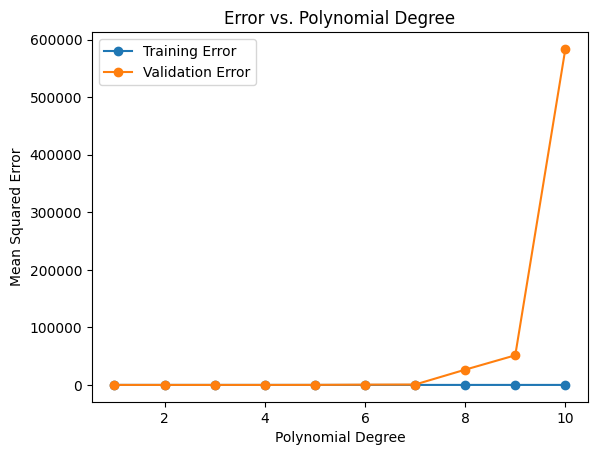

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Generate synthetic data (Non-linear)
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**2 + np.random.randn(100, 1) * 2  # Quadratic with noise

# Try degrees from 1 to 10
degrees = range(1, 11)
train_errors = []
val_errors = []

for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X, y)  # Train model

    # Compute training error
    y_train_pred = model.predict(X)
    train_mse = mean_squared_error(y, y_train_pred)
    train_errors.append(train_mse)

    # Compute cross-validation error
    val_mse = -np.mean(cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    val_errors.append(val_mse)

# Plot training & validation errors
plt.plot(degrees, train_errors, label="Training Error", marker="o")
plt.plot(degrees, val_errors, label="Validation Error", marker="o")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Error vs. Polynomial Degree")
plt.legend()
plt.show()